# WNTR Water Age Simulation
In this notebook, we explore **water quality simulations** in WNTR using concepts similar to those covered in Lecture 19.  
We’ll use the `bwsn2.inp` water network model to demonstrate key examples.

In this exercise, you will:
1. **Define and run** a water age simulation  
2. **Plot time series** of water age at selected junctions  
3. **Analyze the distribution** of water age across the system using a histogram  
4. **Examine relationships** between water age and node degree (e.g., dead-ends) using a box plot
5. **Visualize spatial patterns** of water age across the network
6. **Explore the impact of changing pipe size** on water age

Complete the code where you see 💡


## Imports
Install and import WNTR and additional Python packages that are needed for the tutorial
- Numpy is required to define comparison operators (i.e., np.greater) in queries
- Matplotlib is required to create graphics

In [1]:
# Install required packages if not already available
try:
    import wntr
except ImportError:
    !pip install wntr
    import wntr  # import again after installation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Units
WNTR uses **SI (International System) units (length in meters, time in seconds, mass in kilograms)**.  See https://usepa.github.io/WNTR/units.html for more details.

That means that water age and reaction rates are reported in **s**.

# Water Age Simulation 💧

## Import network model

In [3]:
# Create a WaterNetworkModel from an EPANET INP file
inp = 'networks/bwsn2.inp'
wn = wntr.network.WaterNetworkModel(inp)

C:\Users\ps28866\AppData\Local\anaconda3\envs\wntr_env\lib\site-packages\wntr\epanet\io.py:2075: UserWarning: Not all curves were used in "networks/bwsn2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


In [4]:
# check current model settings
# duration
wn.options.time.duration/3600

48.0

In [5]:
# WQ time step
wn.options.time.quality_timestep

300

In [9]:
# WQ parameter
wn.options.quality.parameter

'AGE'

## Define and run water age simulation ⚙️

In [10]:
wn.options.quality.parameter = 'AGE'
wn.options.quality.parameter

'AGE'

In [11]:
# run simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()           

In [12]:
# get results
age = results.node['quality']/3600
age.head()

name,JUNCTION-0,JUNCTION-1,JUNCTION-2,JUNCTION-3,JUNCTION-4,JUNCTION-5,JUNCTION-6,JUNCTION-7,JUNCTION-8,JUNCTION-9,...,JUNCTION-12517,JUNCTION-12518,JUNCTION-12519,JUNCTION-12520,JUNCTION-12521,JUNCTION-12522,RESERVOIR-12523,RESERVOIR-12524,TANK-12525,TANK-12526
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3600,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
7200,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0
10800,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,3.0,3.0
14400,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.999999,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,0.0,0.0,4.0,4.0


## Plot water age at selected nodes

In [13]:
junctions = wn.junction_name_list
#junctions

In [14]:
# Plot water age at a few nodes (replace with nodes you discussed in class)
nodes_to_plot = ['JUNCTION-1896', 'JUNCTION-9614', 'JUNCTION-8247','JUNCTION-6136']  # example node IDs 
time_hours = age.index / 3600  # Convert seconds to hours

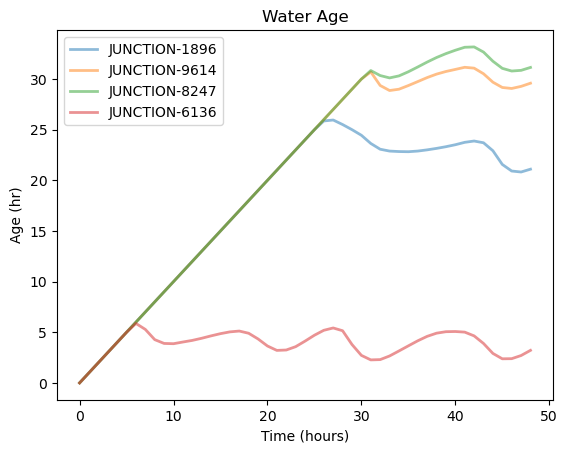

In [15]:
plt.plot(time_hours, age[nodes_to_plot], linewidth = 2, alpha = 0.5)
# Formatting the plot
plt.xlabel('Time (hours)')
plt.ylabel('Age (hr)')
plt.title('Water Age')
plt.legend(nodes_to_plot, loc='best') # labels are assigned based on the order that you plot them
plt.show()

## Explore water age across the network

In [16]:
# let's plot distribution of water ages at all the junctions (excluding tanks, and reservoirs)
junctions = wn.junction_name_list
# junctions[-1]

In [17]:
# get final age @ all nodes
final_age = age.iloc[-1] 
final_age

name
JUNCTION-0         20.446075
JUNCTION-1          7.873904
JUNCTION-2         33.018890
JUNCTION-3          9.564724
JUNCTION-4         13.179276
                     ...    
JUNCTION-12522     48.000000
RESERVOIR-12523     0.000000
RESERVOIR-12524     0.000000
TANK-12525         48.000000
TANK-12526         48.000000
Name: 172800, Length: 12527, dtype: float32

In [18]:
# get final age @ all junctions only
final_age_junc = final_age[junctions]
final_age_junc

name
JUNCTION-0        20.446075
JUNCTION-1         7.873904
JUNCTION-2        33.018890
JUNCTION-3         9.564724
JUNCTION-4        13.179276
                    ...    
JUNCTION-12518    47.999996
JUNCTION-12519    23.132929
JUNCTION-12520    48.000000
JUNCTION-12521    48.000000
JUNCTION-12522    48.000000
Name: 172800, Length: 12523, dtype: float32

### Distribution of water age across the junctions

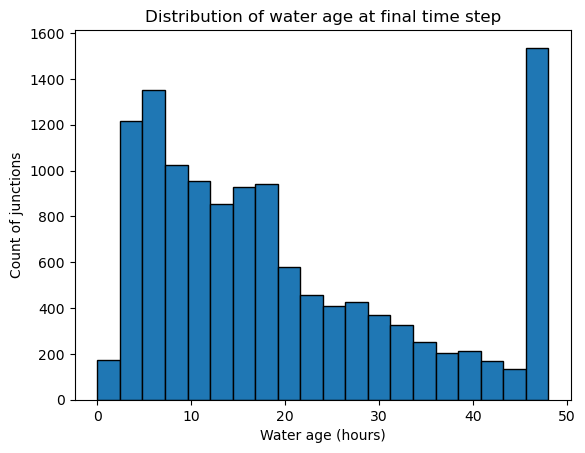

In [20]:
# Plot histogram
plt.hist(final_age_junc, bins=20, edgecolor='black')
plt.xlabel('Water age (hours)')
plt.ylabel('Count of junctions')
plt.title('Distribution of water age at final time step')
plt.show()

### Distribution of water age as a function of node degree

node degree = number of links incident to the junction

dead-ends $ \rightarrow $ node degree == 1
`wntr` has a function to get node degree for all nodes. This relies on **NetworkX** Python package for studying complex networks https://networkx.org/

We will plot a box plot that shows the distribution of water ages for different node degrees.  To do this we will:
1. Get node degree for all junctions
2. Get all water ages for all junctions
3. Store this info in a new dataframe
4. Make box-plot

In [21]:
# Compute node degree from networkx graph ---
G = wn.get_graph()
degree_list = dict(G.degree())
# degree_list # this is a list!

C:\Users\ps28866\AppData\Local\Temp\ipykernel_23576\724202343.py:2: DeprecationWarning: wntr.network.WaterNetworkModel.get_graph is deprecated, use wntr.network.WaterNetworkModel.to_graph instead
  G = wn.get_graph()


In [22]:
# convert the list to dataframe and get only the degree
degree_df = pd.Series(degree_list)
degree_junc = degree_df[junctions]   # only junctions (without tanks and reservoirs)
degree_junc  # this is a dataframe

JUNCTION-0        3
JUNCTION-1        2
JUNCTION-2        3
JUNCTION-3        3
JUNCTION-4        1
                 ..
JUNCTION-12518    2
JUNCTION-12519    3
JUNCTION-12520    2
JUNCTION-12521    2
JUNCTION-12522    3
Length: 12523, dtype: int64

In [23]:
# we can access values only by using
degree_junc.values

array([3, 2, 3, ..., 2, 2, 3], dtype=int64)

In [24]:
# water age is already a data frame
final_age_junc.values

array([20.446,  7.874, 33.019, ..., 48.   , 48.   , 48.   ], dtype=float32)

In [25]:
# check that they are the same length
print(len(final_age_junc))
print(len(junctions))

12523
12523


In [26]:
# Create a DataFrame that combines everything ---
df = pd.DataFrame()
df['Junction'] = junctions
df['Degree'] = degree_junc.values
df['WaterAge'] = final_age_junc.values
df

,Junction,Degree,WaterAge
0,JUNCTION-0,3,20.446075
1,JUNCTION-1,2,7.873904
2,JUNCTION-2,3,33.018890
3,JUNCTION-3,3,9.564724
4,JUNCTION-4,1,13.179276
...,...,...,...
12518,JUNCTION-12518,2,47.999996
12519,JUNCTION-12519,3,23.132929
12520,JUNCTION-12520,2,48.000000
12521,JUNCTION-12521,2,48.000000


Text(0.5, 0.98, '')

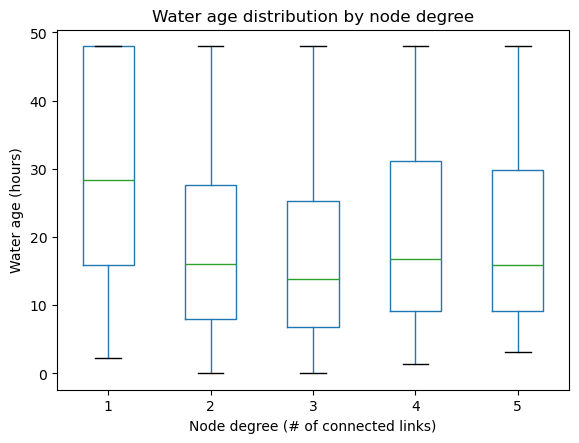

In [28]:
# Box plot of water age by node degree ---
df.boxplot(column = 'WaterAge', by = 'Degree', grid = False)
plt.xlabel('Node degree (# of connected links)')
plt.ylabel('Water age (hours)')
plt.title('Water age distribution by node degree')
plt.suptitle('')  # remove the default pandas subtitle

### Spatial plot of water age across the network 🌍

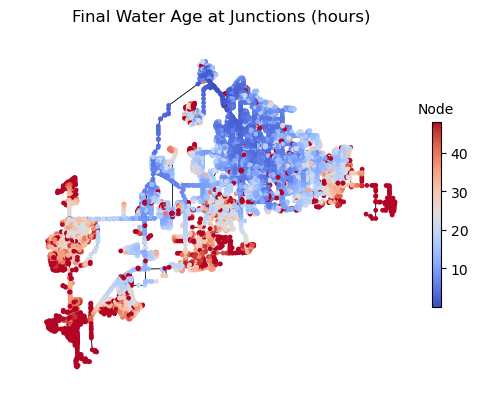

In [27]:
wntr.graphics.plot_network(
    wn,
    node_attribute=final_age_junc,
    title='Final Water Age at Junctions (hours)',
    node_cmap='coolwarm',
    node_size=12,
    link_width=0.5,
    add_colorbar=True
)
plt.show()

### Explore the effect of pipe diameter on water age

In [28]:
# base simulation
#-----------------------------
# set up model
inp = 'networks/bwsn2.inp'
wn = wntr.network.WaterNetworkModel(inp)

# set AGE
wn.options.quality.parameter = 'AGE'  

# run simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()  

#get junction list
junctions = wn.junction_name_list

# get final age @ all nodes
age = results.node['quality']/3600
final_age = age.iloc[-1] 

# get final age @ junctions
age0 = final_age[junctions]

C:\Users\ps28866\AppData\Local\anaconda3\envs\wntr_env\lib\site-packages\wntr\epanet\io.py:2075: UserWarning: Not all curves were used in "networks/bwsn2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


In [30]:
# new simulation
#---------------------------------------
wn = wntr.network.WaterNetworkModel(inp)

# set AGE
wn.options.quality.parameter = 'AGE'

# increase all pipes by 4inch = 0.1016 m
for pipe_name in wn.pipe_name_list:
    pipe = wn.get_link(pipe_name)
    pipe.diameter += 0.1016  # +4 inch

# run simulation
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()    # increase all pipe diameters by 4inch ~= 100 mm 

# get final age @ all nodes
age = results.node['quality']/3600
final_age = age.iloc[-1] 

# get final age @ junctions
age1 = final_age[junctions]

C:\Users\ps28866\AppData\Local\anaconda3\envs\wntr_env\lib\site-packages\wntr\epanet\io.py:2075: UserWarning: Not all curves were used in "networks/bwsn2.inp"; added with type None, units conversion left to user
  warnings.warn('Not all curves were used in "{}"; added with type None, units conversion left to user'.format(self.wn.name))


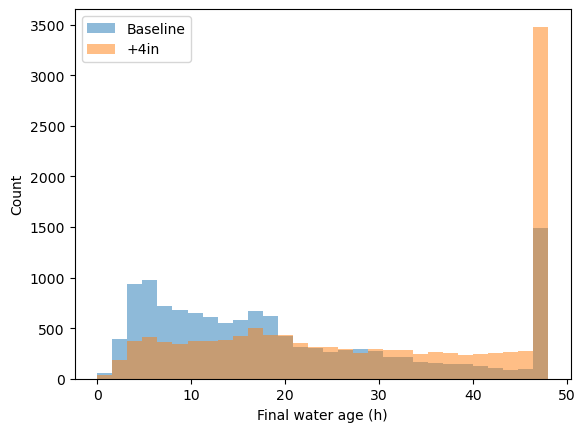

In [31]:
# Histogram overlay to see the shift
plt.hist(age0, bins = 30, alpha = 0.5, label = 'Baseline')
plt.hist(age1, bins = 30, alpha = 0.5, label = '+4in')
plt.xlabel('Final water age (h)'); plt.ylabel('Count'); plt.legend(); plt.show()

In [32]:
print("Mean water age before/after (h):", age0.mean(), age1.mean())
print("75th percentile before/after (h):",
      np.percentile(age0.dropna(), 75), np.percentile(age1.dropna(), 75))

Mean water age before/after (h): 20.108189 29.340546
75th percentile before/after (h): 29.149855613708496 47.98508262634277
